In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [74]:
tau = 2*np.pi
speed = 0.01
d_theta = 0.8
interaction_threshold = np.array([0.01, 0.01])

In [122]:
class Agent:
    def __init__(self):
        self.loc = np.expand_dims(np.random.rand(2), axis=1)
        self.theta = tau*np.random.random()
        self.level = np.random.choice([0,1])
        self.transfering = False
        
    def step(self):        
        # theta-correlated random walk
        self.theta = (self.theta + d_theta*np.random.uniform(-1,1)) % tau
        self.loc += np.expand_dims(np.array([speed*np.cos(self.theta), speed*np.sin(self.theta)]), axis=1)
        
        #periodic boundary
        self.loc[0][0] = self.loc[0][0] % 1
        self.loc[1][0] = self.loc[1][0] % 1

In [131]:
a = Agent()
trajectory = a.loc

for _ in range(200):
    a.step()
    trajectory = np.concatenate((trajectory, a.loc), axis=1)
    
trajectory.shape

(2, 201)

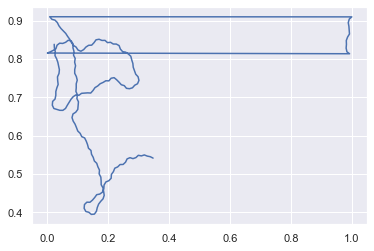

In [132]:
plt.plot(trajectory[0], trajectory[1])

In [117]:
def find_interaction(population, index_1, index_2):
    agent = population[index_1]
    other = population[index_2]
    
    if agent.transfering:  # multiple interactions aren't allowed in same timestep
        agent.transfering = False
        return
        
    if other.transfering:  # interaction won't take place if other agent is already interacting
        other.transfering = False
        return
            
    if np.all(np.abs(other.loc - agent.loc) <= interaction_threshold):
        other.transfering = True
        agent.transfering = True
            
        diff = (other.level - agent.level)/2
        other.level -= diff
        agent.level += diff

In [119]:
def simulate(population_size, steps):
    population = [Agent() for _ in range(population_size)]
    
    for _ in range(steps):
        for i in range(population_size):
            for j in range(population_size):
                find_interaction(population, i, j)

        for i in range(population_size):
            population[i].step()
            
    return population

In [133]:
pop = simulate(30, 1000)

In [134]:
levels = [agent.level for agent in pop]
levels

[0.19140625,
 0.302734375,
 0.242919921875,
 0.359130859375,
 0.36883544921875,
 0.40875244140625,
 0.36883544921875,
 0.51727294921875,
 0.224609375,
 0.359130859375,
 0.3720703125,
 0.15771484375,
 0.2109375,
 0.29888916015625,
 0.257080078125,
 0.3939971923828125,
 0.352508544921875,
 0.3939971923828125,
 0.257080078125,
 0.296875,
 0.4327392578125,
 0.29888916015625,
 0.3626708984375,
 0.29296875,
 0.352508544921875,
 0.364105224609375,
 0.474609375,
 0.372467041015625,
 0.364105224609375,
 0.35015869140625]